**Please don't put any answers in markdown cells.**

Grading is a hair easier when I know that your stuff is only in code cells and my stuff is only in markdown cells.  Sorry about any annoyances from having to type some responses as comments.

0. Load all libraries needed for your code in the cell below.

> *Before you turn it in, make sure you aren't `import`ing anything that your code doesn't need.*

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Read the data found at `data_url` into a `pandas` dataframe.

> *Name the dataframe `subs` so that some starter code below will work for you.*

In [3]:
data_url = "http://ballings.co/hidden/aCRM/data/chapter2/subscriptions.txt"
subs = pd.read_csv(data_url, delimiter=";")

2. Show the `shape` and `head` of the data.

> The below line of code is nice to know about (see [docs](https://pandas.pydata.org/docs/user_guide/options.html) for more).
> 
> ```py
> pd.options.display.max_columns = 999
> ```

In [4]:
pd.options.display.max_columns = 999
print(subs.shape)
subs.head()

(227, 21)


,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
0,1000024,1150045,8,1111110,18/01/2010,17/04/2010,76,25,17/03/2010,BT,Paid,27/01/2010,8552,79.0000,79.0,1.039474,0.0,0.0000,0.0000,79.0,0.0
1,1000082,1150046,8,1111110,14/01/2010,12/03/2010,50,25,03/03/2010,BT,Paid,11/02/2010,10017,51.9737,29.6,0.592000,0.0,22.3737,22.3737,29.6,0.0
2,100012,89085,8,1111110,01/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2
3,100013,89085,8,1111110,02/01/2007,31/12/2007,304,25,01/12/2007,BT,Paid,28/12/2006,874,235.0000,235.0,0.773026,0.0,0.0000,0.0000,235.0,0.0
4,100016,89087,8,1111110,01/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2


3. Ensure the `Pattern` variable is clean!

> The data is for newspaper subscriptions.  `Pattern` indicates what days of the week we deliver to the customer;  it should be 7 digits.  Your data read likely converted the column to `int` which loses some of the digits.  Please fix.
>
> There should be seven digits in the `Pattern` to indicate each day of the week. The week starts on Monday. eg: `1000000` indicates delivery only on monday; eg: `0000001` indicates delivery only on sunday; eg: `1111111` indicates delivery on all days.

In [5]:
subs["Pattern"] = subs["Pattern"].astype(str)

In [6]:
subs["Pattern"] = subs["Pattern"].str.zfill(7)

In [10]:
subs["Pattern"].apply(len).unique()

array([7])

4. What are the most popular `Patterns`? Show a table or graphic.

In [12]:
pattern_counts = subs["Pattern"].value_counts()
most_popular_pattern = pattern_counts.idxmax()
print("Most Popular Pattern:", most_popular_pattern)
pattern_counts_df = pd.DataFrame(
    {"Pattern": pattern_counts.index, "Count": pattern_counts.values}
)
print(pattern_counts_df)

Most Popular Pattern: 1111110
   Pattern  Count
0  1111110    217
1  0000010      9
2  0000110      1


5. How many records contain NAs in this data?

In [13]:
na_count = subs.isna().sum().sum()
print("Number of records with NAs:", na_count)

Number of records with NAs: 141


6. Which columns have the most NAs?

In [14]:
na_counts = subs.isna().sum()
columns_with_most_nas = na_counts.sort_values(ascending=False)
print("Column with the most NAs:")
print(columns_with_most_nas.head(1))

Column with the most NAs:
RenewalDate    49
dtype: int64


7. Create a subset of your data that shows the rows that contain any NAs

> *display just the `head()` of these records*

In [15]:
subset_with_nas = subs[subs.isna().any(axis=1)]
subset_with_nas.head()

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
9,1000566,309653,2,1111110,13/02/2010,13/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1000774,110573,8,1111110,13/02/2010,15/05/2010,76,10,NaN,BT,Paid,27/01/2010,8552,79.000000,79.0,1.039474,0.0,0.000000,0.000000,79.0,0.0
17,1000848,892534,5,1111110,13/02/2010,12/04/2011,354,10,NaN,BT,Paid,22/02/2010,9690,310.914306,267.0,0.754237,0.0,43.914306,43.914306,267.0,0.0
19,1001214,246132,8,1111110,16/01/2010,16/01/2010,152,25,NaN,BT,Not Paid,NaN,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,100131,89154,8,1111110,08/05/2006,07/05/2007,303,15,NaN,BT,Paid,25/04/2006,873,229.000000,229.0,0.755776,0.0,0.000000,0.000000,229.0,0.0


8. Choose one of the columns that contains NAs and hypothesize what a missing value could mean in this context.

> * Is it worrisome, just random data issues, or is there some pattern/context you think could explain them?
> * Would we want to drop these records before doing any analysis? (add nuance as you'd like)
>
> *Big ole hint: there \*is\* a pattern of missingness for the records with missing values in the `TotalPrice` column.*

In [16]:
# Any code here:
print("PaymentDate contains NAs")
subs[subs["PaymentDate"].isna()]
# (make sure it doesn't make a huge wall of output to scroll by)

PaymentDate contains NAs


,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
9,1000566,309653,2,1111110,13/02/2010,13/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1001214,246132,8,1111110,16/01/2010,16/01/2010,152,25,NaN,BT,Not Paid,NaN,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1003649,951565,8,1111110,18/02/2010,18/02/2010,152,10,NaN,BT,Not Paid,NaN,9104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,1003776,25909,6,1111110,18/02/2010,18/02/2010,76,10,NaN,BT,Not Paid,NaN,8644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,1007193,642513,7,1111110,13/02/2010,13/02/2010,152,10,NaN,BT,Not Paid,NaN,8789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1008646,770532,6,1111110,24/02/2010,24/02/2010,152,10,NaN,BT,Not Paid,NaN,8955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,1009148,135581,8,1111110,25/02/2010,25/02/2010,76,10,NaN,BT,Not Paid,NaN,9142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,1009992,791847,6,1111110,26/02/2010,26/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,1010151,1120343,8,0000010,30/01/2010,06/02/2010,52,4,NaN,BT,Not Paid,NaN,9492,57.2,45.0,0.865385,0.0,12.2,12.2,0.0,0.0
176,1010643,968445,8,0000110,27/02/2010,15/05/2010,104,8,NaN,BT,Not Paid,NaN,1505,57.2,57.2,1.100000,0.0,0.0,0.0,0.0,0.0


In [55]:
# Written answer here:
# This is not random data issues. PaymentDate is NA when it has not been paid. Since PaymentStatus is "Not Paid"
# We cannot drop these records before analysis, since some NAs is not missing data, we must figure out reasons. after that, we can either keep NAs, fix NAs, or delete NA records.
#
#

9. `str_subset` and `list_subset` are created for you below. Investigate the difference in how they each display, their `.head`'s, and their `.shape`s.

In [17]:
str_subset = subs["TotalPrice"].head(3)
list_subset = subs[["TotalPrice"]].head(3)

In [18]:
# Make sure to run this cell before changing any code to see the display
print(str_subset)
print(str_subset.head())
print(str_subset.shape)
print(
    "It is a pandas Series, It will display as a single-column Series. It has 3 rows and no columns (it's one-dimensional)."
)

0     79.0
1     29.6
2    246.8
Name: TotalPrice, dtype: float64
0     79.0
1     29.6
2    246.8
Name: TotalPrice, dtype: float64
(3,)
It is a pandas Series, It will display as a single-column Series. It has 3 rows and no columns (it's one-dimensional).


In [19]:
# Make sure to run this cell before changing any code to see the display
print(list_subset)
print(list_subset.head())
print(list_subset.shape)
print("It is a DataFrame,  it has 3 rows and 1 column.")

   TotalPrice
0        79.0
1        29.6
2       246.8
   TotalPrice
0        79.0
1        29.6
2       246.8
(3, 1)
It is a DataFrame,  it has 3 rows and 1 column.


10. Make a variable showing how long a customer has been with us in days.

>   * I'll refer to this variable as "`CustomerLifetimeDays`" in future prompts.
>   * *Make sure you don't ignore any warnings; read them and act on them as needed.*

In [20]:
# Convert "StartDate" and "EndDate" columns to datetime objects if they are not already
subs["StartDate"] = pd.to_datetime(subs["StartDate"], dayfirst=True)
subs["EndDate"] = pd.to_datetime(subs["EndDate"], dayfirst=True)

# Calculate the duration in days and create a new column "CustomerDuration"
subs["CustomerLifetimeDays"] = (subs["EndDate"] - subs["StartDate"]).dt.days

In [21]:
subs.head()

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit,CustomerLifetimeDays
0,1000024,1150045,8,1111110,2010-01-18,2010-04-17,76,25,17/03/2010,BT,Paid,27/01/2010,8552,79.0000,79.0,1.039474,0.0,0.0000,0.0000,79.0,0.0,89
1,1000082,1150046,8,1111110,2010-01-14,2010-03-12,50,25,03/03/2010,BT,Paid,11/02/2010,10017,51.9737,29.6,0.592000,0.0,22.3737,22.3737,29.6,0.0,57
2,100012,89085,8,1111110,2008-01-01,2008-12-30,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2,364
3,100013,89085,8,1111110,2007-01-02,2007-12-31,304,25,01/12/2007,BT,Paid,28/12/2006,874,235.0000,235.0,0.773026,0.0,0.0000,0.0000,235.0,0.0,363
4,100016,89087,8,1111110,2008-01-01,2008-12-30,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2,364


11. Compute the quartiles, mean, and sd of `CustomerLifetimeDays`.

In [22]:
quartiles = subs["CustomerLifetimeDays"].quantile([0.25, 0.50, 0.75])

# Compute mean
mean = subs["CustomerLifetimeDays"].mean()

# Compute standard deviation
std_dev = subs["CustomerLifetimeDays"].std()

# Display the results
print("Quartiles:")
print(quartiles)
print("\nMean:", mean)
print("Standard Deviation:", std_dev)

Quartiles:
0.25     91.0
0.50    353.0
0.75    364.0
Name: CustomerLifetimeDays, dtype: float64

Mean: 232.11453744493392
Standard Deviation: 147.64321114286676


12. Calculate the variance of `CustomerLifetimeDays`.

In [23]:
variance = subs["CustomerLifetimeDays"].var()

print("Variance of CustomerLifetimeDays:", variance)

Variance of CustomerLifetimeDays: 21798.517796577136


13. Type out the math for calculating variance.

> Use a markdown cell to answer! It should show the fancy math in the markdown. (i know, i know, this contradicts the note on the top of the file).  Your answer cell below holding a classic formula.

Your answer:

--------
**Population Variance Formula:**

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$



$$y = mx + b$$



--------

14. Show a histogram of `CustomerLifetimeDays`.

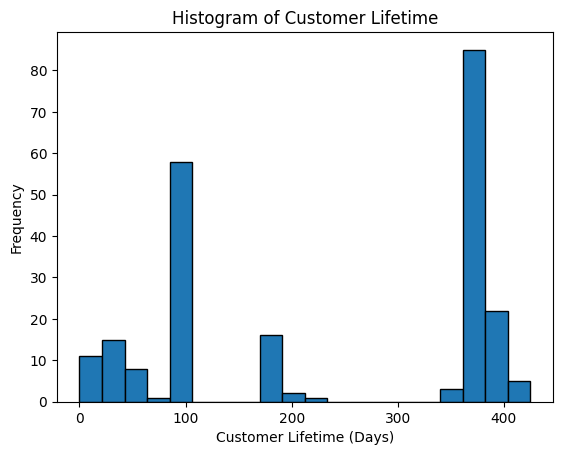

In [24]:
plt.hist(subs["CustomerLifetimeDays"], bins=20, edgecolor="k")
plt.xlabel("Customer Lifetime (Days)")
plt.ylabel("Frequency")
plt.title("Histogram of Customer Lifetime")
plt.show()

15. Use your business knowledge (and math and stuff), to find a variable that is associated with `CustomerLifetimeDays`.
    * A. Show some numeric evidence that there's a meaningful relationship between your selected variable and `CustomerLifetimeDays`.
    * B. Create a plot that further proves there's a meaningful relationship between your variable and `CustomerLifetimeDays`.
    * C.  Interpret the relationship between CustomerLifetimeDays and your variable.

In [26]:
subs.sort_values(by="CustomerLifetimeDays", ascending=False)

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit,CustomerLifetimeDays
91,1005451,737931,3,1111110,2010-02-20,2011-04-21,304,10,NaN,BT,Paid,09/02/2010,8640,267.000000,267.0,0.878289,0.0,0.000000,0.000000,267.0,0.0,425
17,1000848,892534,5,1111110,2010-02-13,2011-04-12,354,10,NaN,BT,Paid,22/02/2010,9690,310.914306,267.0,0.754237,0.0,43.914306,43.914306,267.0,0.0,423
28,1001774,94618,8,1111110,2010-03-04,2011-04-27,304,10,NaN,BT,Paid,23/02/2010,8637,267.000000,267.0,0.878289,0.0,0.000000,0.000000,267.0,0.0,419
10,1000640,1111604,8,1111110,2010-01-20,2011-03-04,329,25,02/02/2011,BT,Paid,27/01/2010,9419,288.957237,267.0,0.811550,0.0,21.957237,21.957237,267.0,0.0,408
46,1002910,1134353,5,1111110,2010-01-24,2011-03-04,329,25,02/02/2011,BT,Paid,23/02/2010,9442,288.957236,267.0,0.811550,0.0,21.957236,21.957236,267.0,0.0,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1003776,25909,6,1111110,2010-02-18,2010-02-18,76,10,NaN,BT,Not Paid,NaN,8644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
66,1003649,951565,8,1111110,2010-02-18,2010-02-18,152,10,NaN,BT,Not Paid,NaN,9104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19,1001214,246132,8,1111110,2010-01-16,2010-01-16,152,25,NaN,BT,Not Paid,NaN,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1000566,309653,2,1111110,2010-02-13,2010-02-13,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [39]:
# A: Show some numeric evidence that there's a meaningful relationship
#    between your selected variable and `CustomerLifetimeDays`.
print("selected variable is TotalPrice, correlation is:")
subs["TotalPrice"].corr(subs["CustomerLifetimeDays"])

selected variable is TotalPrice, correlation is:


0.9065721157516228

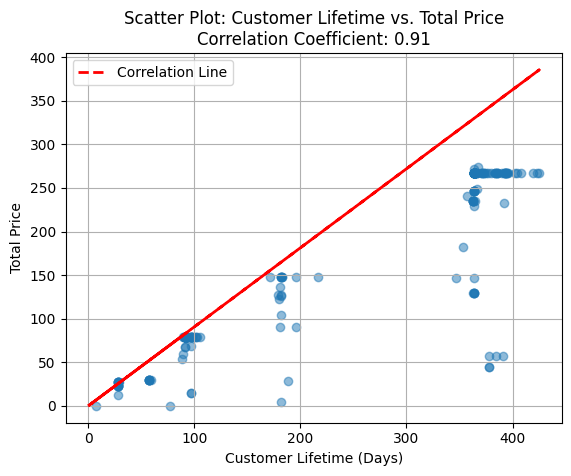

In [43]:
# B: Create a plot that further proves there's a meaningful relationship
#    between your variable and `CustomerLifetimeDays`.
# Calculate the correlation coefficient between 'TotalPrice' and 'CustomerLifetimeDays'
correlation_coefficient = subs["TotalPrice"].corr(subs["CustomerLifetimeDays"])

# Create a scatter plot with 'CustomerLifetimeDays' on the x-axis
plt.scatter(subs["CustomerLifetimeDays"], subs["TotalPrice"], alpha=0.5)
plt.xlabel("Customer Lifetime (Days)")
plt.ylabel("Total Price")
plt.title(
    f"Scatter Plot: Customer Lifetime vs. Total Price\nCorrelation Coefficient: {correlation_coefficient:.2f}"
)
plt.grid(True)

# Create a correlation line
x_values = np.array(subs["CustomerLifetimeDays"])
y_values = np.array(subs["TotalPrice"])
plt.plot(
    x_values,
    correlation_coefficient * x_values,
    color="red",
    linestyle="--",
    linewidth=2,
    label="Correlation Line",
)

# Show legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# C: Interpret the relationship between CustomerLifetimeDays and your variable
#
# as CustomerLifetimeDays increases, total price goes up, except for some outliers.
# it is easy to understand that when a customer spend longer time with newspapers, he/she will spend more money in total. but for some certain customers, they may subscribe newspapers
# less frequently, like once a week, that is why they spent quite fewer money even if their CustomerLifetimeDays is big.